## Q2

For a few reasons, the analysis was performed directly from the raw data, and only “02 regular” type was selected for visualization in 3 seasons (in order to be as clear as possible).

In [1]:
import requests
import pickle
from Data.NHLPlayByPlay import NHLPlayByPlay
from tqdm import tqdm

In [2]:
# not working get data in this way.

In [3]:
import os
from threading import local
#Defines the seasons and game types we want to download
seasons = ['2018','2019','2020']
gameTypes  = ['01','02','03']
localdir = os.getcwd() + '/visual'
print(localdir)
# if localdir:
#     for s in seasons:
#         for t in gameTypes:
#             data = NHLPlayByPlay(season=s,GameType=t, localdir=localdir)

/Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual


In [54]:
if localdir:
    s='2018'
    for t in gameTypes:
        NHLPlayByPlay(season=s,GameType=t, localdir=localdir)

Loaded 110 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/201801.pkl
Loaded 1271 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/201802.pkl
Loaded 105 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/201803.pkl


In [67]:
#check data
with open('visual/201803.pkl', 'rb') as f:
    game_data = pickle.load(f)

In [70]:
#print(game_data['2018030122'])

In [94]:
if localdir:
    s='2019'
    for t in gameTypes:
        NHLPlayByPlay(season=s,GameType=t, localdir=localdir)

Loaded 107 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/201901.pkl
Loaded 1271 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/201902.pkl
Loaded 151 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/201903.pkl


In [99]:
if localdir:
    s='2020'
    for t in gameTypes:
        NHLPlayByPlay(season=s,GameType=t, localdir=localdir)

Loaded 0 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/202001.pkl
Loaded 868 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/202002.pkl
Loaded 105 Games stored in local drive /Users/boweike/Desktop/UdeM/IFT6758/IFT6758-Project/visual/202003.pkl


In [197]:
game_data = []
year = ['2018','2019','2020']
season_type = ['01','02']
#1271 for seasons with 31 teams after year 2017 
max_game_id = 1272

In [4]:
def get_data(year):
    game_data = []
    season = '02'
    #1271 for seasons with 31 teams after year 2017 
    max_game_id = 1272
    for i in tqdm(range(0,max_game_id)): 
        r = requests.get(url=' http://statsapi.web.nhl.com/api/v1/game/'
             + year + season +str(i).zfill(4)+'/feed/live')
        data = r.json() 
        game_data.append(data)
    return game_data

In [5]:
data_18 = get_data('2018')

100%|███████████████████████████████████████| 1272/1272 [02:35<00:00,  8.18it/s]


In [6]:
print(len(data_18))

1272


In [8]:
with open('201802'+'.pkl', 'wb') as f:
    pickle.dump(data_18, f, pickle.HIGHEST_PROTOCOL)

In [9]:
#do same for 2019 and 2020 season
data_19 = get_data('2019')
data_20 = get_data('2020')

100%|███████████████████████████████████████| 1272/1272 [02:27<00:00,  8.65it/s]


In [10]:
with open('201902'+'.pkl', 'wb') as f:
    pickle.dump(data_19, f, pickle.HIGHEST_PROTOCOL)

with open('202002'+'.pkl', 'wb') as f:
    pickle.dump(data_20, f, pickle.HIGHEST_PROTOCOL)

In [11]:
print(len(data_19),len(data_20))

1272 1272


In [22]:
#game_data['2018020001']['liveData']['plays']['allPlays']

In [18]:
import numpy as np 
import pandas as pd 
import pickle    
import matplotlib
import matplotlib.pyplot as plt
color_map = plt.cm.winter
from matplotlib.patches import RegularPolygon
import math
from PIL import Image
# Needed for custom colour mapping!
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
%matplotlib inline

In [25]:
#Q2

In [19]:
#define the corrdinate for goal and shoot
def get_shot_goal_data(game_data):
    
    #return league_data with info below
    league_data = {}
    league_data['Shot'] = {}
    league_data['Shot']['x'] = []
    league_data['Shot']['y'] = []
    league_data['Goal'] = {}
    league_data['Goal']['x'] = []
    league_data['Goal']['y'] = []
    event_types = ['Shot','Goal']

    for data in game_data:
    #iter game_data(dic) when use NHLPlayByPlay.py  
    #for data in game_data.values():
        if 'liveData' not in data:
            continue
        allplays = data['liveData']['plays']['allPlays'] 
        for play in allplays:       
            for event in event_types: 
                # If the play contains one of the events
                if play['result']['event'] in [event]:  
                    # Note not all coordinates contains x and y so must check both!
                    if 'x' in play['coordinates'] and 'y' in play['coordinates']:
                        league_data[event]['x'].append(play['coordinates']['x'])
                        league_data[event]['y'].append(play['coordinates']['y'])
    print(len(league_data['Goal']['x']),len(league_data['Goal']['y']))
    return league_data

In [23]:
def data_flip(league_data):
    # Concatenate the arrays for x and y league data
    x_all_shots = league_data['Shot']['x'] + league_data['Goal']['x'];
    y_all_shots = league_data['Shot']['y'] + league_data['Goal']['y']

    # flip the coordinates when necessary(i.e. (x or y) <0)
    # initial normalized list
    x_all_shots_norm = []
    y_all_shots_norm = []

    # Enumerate the list 
    for i,s in enumerate(x_all_shots):
        if x_all_shots[i] <0:
            x_all_shots_norm.append(-x_all_shots[i])
            y_all_shots_norm.append(-y_all_shots[i])
        else:
            x_all_shots_norm.append(x_all_shots[i])
            y_all_shots_norm.append(y_all_shots[i])

    # Do the same for goal
    x_goal_norm = []
    y_goal_norm = []
    for i,s in enumerate(league_data['Goal']['x']):
        if league_data['Goal']['x'][i] < 0:
            x_goal_norm.append(-league_data['Goal']['x'][i])
            y_goal_norm.append(-league_data['Goal']['y'][i])
        else:
            x_goal_norm.append(league_data['Goal']['x'][i])
            y_goal_norm.append(league_data['Goal']['y'][i])
    return [x_all_shots_norm, y_all_shots_norm, x_goal_norm, y_goal_norm]


In [92]:
def data_plot(year, shot_goal_xy):#figure plot prepare 
    x_all_shots_norm = shot_goal_xy[0]
    y_all_shots_norm = shot_goal_xy[1]
    x_goal_norm = shot_goal_xy[2]
    y_goal_norm = shot_goal_xy[3]
    
    #To keep the aspect ration correct we use a square figure size
    
    xbnds = np.array([-100,100])
    ybnds = np.array([-100,100])
    extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
    # set unit increments size  
    gridsize = 50
    mincnt = 0
    
    #it's ok to see empty figure just for test!(alpha = 0)
    #hexbin function
    hex_data = plt.hexbin(x_all_shots_norm, y_all_shots_norm,gridsize=gridsize, extent=extent,mincnt=mincnt,alpha = 0)
    # get the bin coordinates and counts
    bin_point = hex_data.get_offsets()
    shot_count = hex_data.get_array()

    # Do the same for goal data
    goal_hex_data =  plt.hexbin(x_goal_norm, y_goal_norm,gridsize=gridsize, extent=extent,mincnt=mincnt,alpha= 0)
    bin_point = goal_hex_data.get_offsets()
    goal_count = goal_hex_data.get_array()    


    # Using matplotlib create a new figure for plotting
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)

    # Clean up the figure to be completely blank
    ax.set_facecolor("white")
    fig.patch.set_facecolor("white")
    fig.patch.set_alpha(0.0)

    # Remove the labelling of axes
    ax.set_xticklabels(labels = [''])
    ax.set_yticklabels(labels = [''])
    # Using pillow to get the rink image and extract the image size
    I = Image.open('map.png')
    ax.imshow(I);width, height = I.size

    # Calculate the scaling factor and offset (trial and error)
    scalingx = width/100 - 0.6;
    scalingy = height/100 + 0.5;
    x_trans = 33;
    y_trans = height/2

    # Scale the size of our hex bins with the image so we calculate a "radius" scaling factor here
    S =2*scalingx;

    for i,v in enumerate(bin_point):

        # Ignore empty locations
        if shot_count[i] < 1:
            continue
        # Normalize shot frequency data 
        shot_freq = shot_count[i] / max(shot_count)

        # Scale the hexagon size based on shot frequency
        radius = S*math.sqrt(shot_freq)
        #set shot red
        shot_color = '#FF0000'
        #plot the hexagon
        hex = RegularPolygon((x_trans+v[0]*scalingx, y_trans-v[1]*scalingy),\
                             numVertices=6, radius=radius, orientation=np.radians(0),
                             facecolor=shot_color, alpha=0.2, edgecolor=None)
        ax.add_patch(hex)

    #do same for goal
    for i,v in enumerate(bin_point):
        # Ignore empty locations
        if goal_count[i] < 1:
            continue
        # Normalize goal frequency data 
        goal_freq = goal_count[i] / max(goal_count)

        # Scale the hexagon size based on goal frequency
        radius = S*math.sqrt(goal_freq)
        #set goal green
        goal_color = '#008000'
        # plot the hexagon
        hex = RegularPolygon((x_trans+v[0]*scalingx, y_trans-v[1]*scalingy),\
                             numVertices=6, radius=radius, orientation=np.radians(0), \
                             facecolor=goal_color, alpha=0.8, edgecolor=None)
        ax.add_patch(hex)
    p_title = 'Season {}-{} shot(red)-goal(green) map'.format(year,year+1)
    plt.title(p_title)

In [30]:
with open('201802.pkl', 'rb') as f:
    game_data = pickle.load(f)
shot_goal_18 = get_shot_goal_data(game_data)
shot_goal_fliped_18 = data_flip(shot_goal_18)

7762 7762


/var/folders/ft/95p82c5j2zqgwg_m_l8hj7jc0000gn/T/ipykernel_94803/2506660522.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''])
/var/folders/ft/95p82c5j2zqgwg_m_l8hj7jc0000gn/T/ipykernel_94803/2506660522.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''])


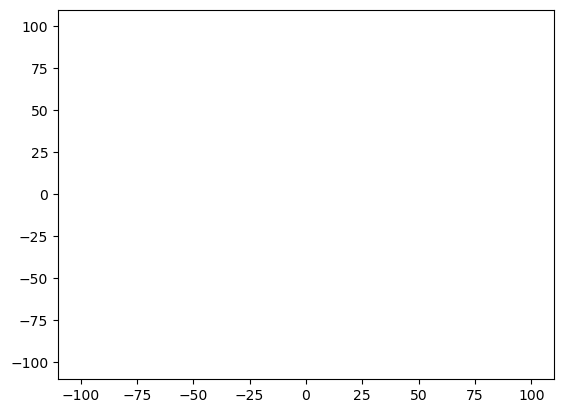

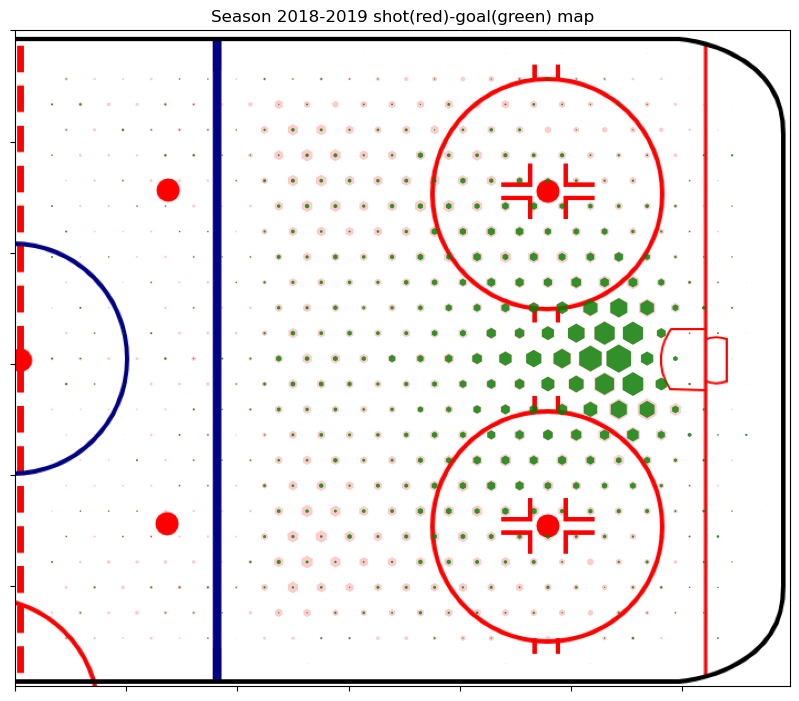

In [93]:
data_plot(2018, shot_goal_fliped_18)

6648 6648


/var/folders/ft/95p82c5j2zqgwg_m_l8hj7jc0000gn/T/ipykernel_94803/3216153463.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''])
/var/folders/ft/95p82c5j2zqgwg_m_l8hj7jc0000gn/T/ipykernel_94803/3216153463.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''])


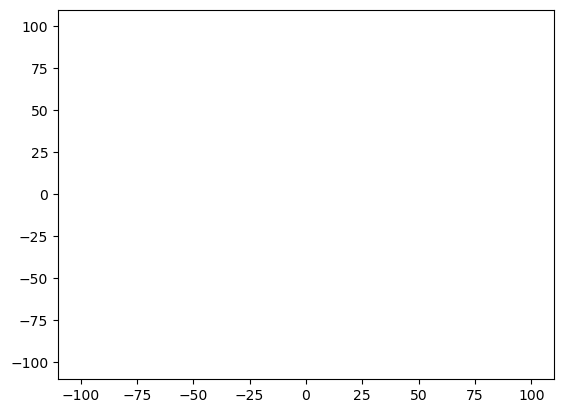

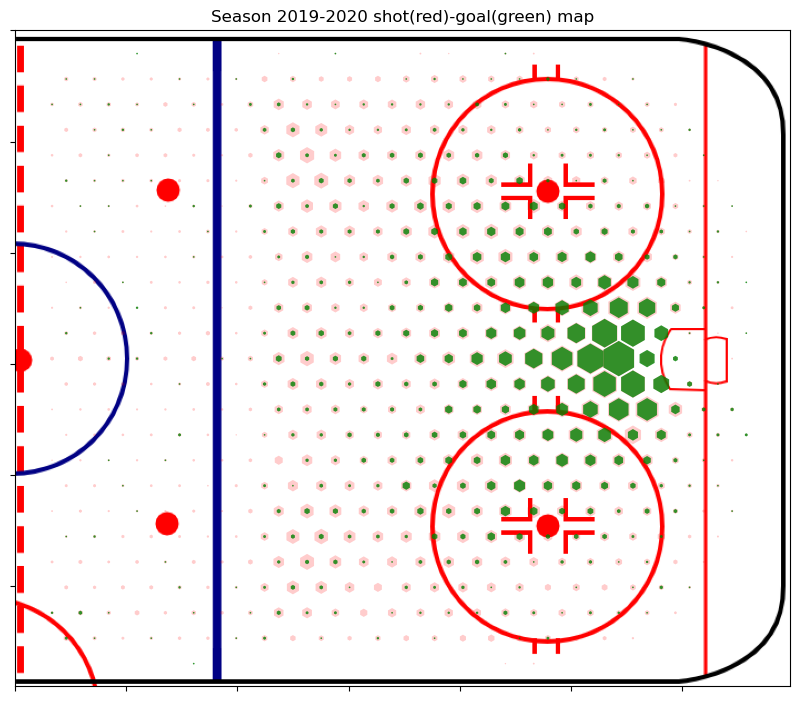

In [51]:
with open('201902.pkl', 'rb') as f:
    game_data = pickle.load(f)
shot_goal_19 = get_shot_goal_data(game_data)
shot_goal_fliped_19 = data_flip(shot_goal_19)
data_plot(2019, shot_goal_fliped_19)

5176 5176


/var/folders/ft/95p82c5j2zqgwg_m_l8hj7jc0000gn/T/ipykernel_94803/3216153463.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''])
/var/folders/ft/95p82c5j2zqgwg_m_l8hj7jc0000gn/T/ipykernel_94803/3216153463.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''])


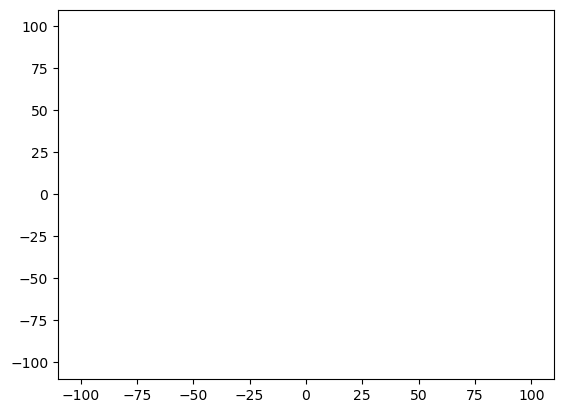

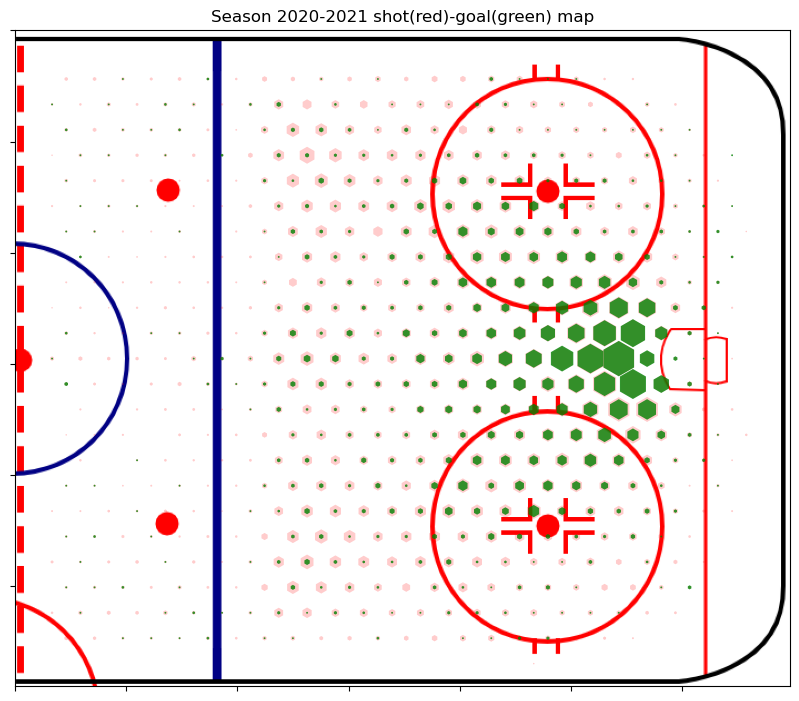

In [52]:
with open('202002.pkl', 'rb') as f:
    game_data = pickle.load(f)
shot_goal_20 = get_shot_goal_data(game_data)
shot_goal_fliped_20 = data_flip(shot_goal_20)
data_plot(2020, shot_goal_fliped_20)

## Discussion of Simple Visualizations Q2

From the above three seasons shot-goal map visualization analysis, it is evident that goals (and also shots) are mainly concentrated near the goal crease and are inversely proportional to the distance from the cage. As the distance gets closer to the midline of the pitch, the chances of both shots and goals become very sparse.